In [1]:
import tensorflow as tf

In [2]:
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
from tensorflow.keras import models, layers

In [4]:
BATCH_SIZE=32 # TF BATCH OF  TOTAL IMAGES
IMAGE_SIZE=256 # IMAGE W*H
CHANNELS=3  # rgb COLOR
EPOCHS=50  # NUMBER OF RUN MODEL

In [5]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
    
)

Found 2152 files belonging to 3 classes.


In [6]:
class_names=dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

(32, 256, 256, 3)
[1 0 2 1 1 0 1 0 0 1 0 0 1 0 0 0 1 1 2 0 1 1 1 1 1 1 0 0 2 2 1 0]


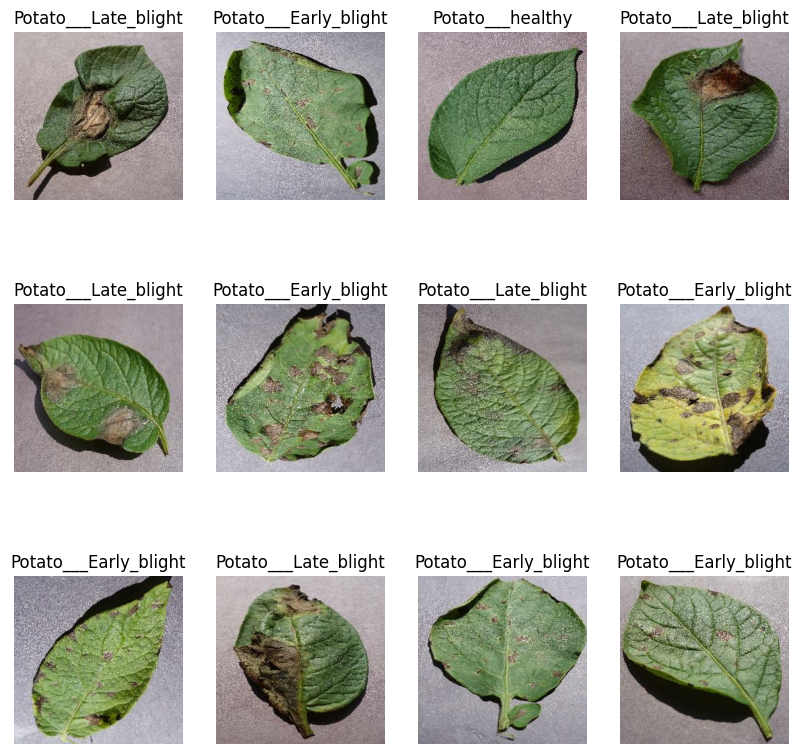

In [7]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())
    
    for i in range(12):
        ax=plt.subplot(3,4,i+1),
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')


In [8]:
# 80%>= Traning
# Test=0.2
#    10%>= validation
#    10%>= accuracy

train_size=0.8
test=0.2


In [9]:
len(dataset)*train_size

54.400000000000006

In [10]:
train_ds=dataset.take(54)

In [22]:
test_ds=dataset.skip(54).take(6)

In [13]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [16]:
val_ds=test_ds.take(6)

In [17]:
acc_ds=test_ds.skip(6)

In [18]:
def split_dataset(ds, traing_split=0.8, val_split=1.0, test_split=0.1, shuffle=True):
    #assert(traing_split+val_split+test_split) == 1
    
    ds_size=len(ds)
    
    # values of split
    traing_size=int(ds_size*traing_split)
    test_size=int(ds_size*test_split)
    val_size=int(ds_size*test_split)
    
    # take values
    traing_ds=ds.take(train_size)
    val_ds=ds.skip(traing_size).take(val_size)
    test_ds=skip(traing_size).skip(val_size).take(test_size)
    
    return traing_ds, val_ds , test_ds

In [19]:
traing_ds, val_ds , test_ds=split_dataset(dataset)

TypeError: Cannot convert 0.8 to EagerTensor of dtype int64

In [21]:
from sklearn.model_selection import train_test_split

In [25]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [28]:
resize_and_scale_image=tf.keras.Sequential([
    
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [32]:
image_augmentation=tf.keras.Sequential([
    
    layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [ ]:
x_train,x_test,y_train,y_test=train_test_split()